# Instalação e Importação dos pacotes

In [ ]:
#Instalação dos Pacotes
#!pip install openpyxl
#!pip install pandas
#!pip install locate
#!pip install numpy
#!pip install -q -U watermark

In [60]:
#Importação dos Pacotes
import pandas as pd
import random
import numpy as np
import math
import locale
import numpy as np
import matplotlib.pyplot as plt
import random
import math

from scipy.special import comb

pd.set_option('display.max_columns', None)

from collections import Counter

# Define o locale para pt_BR
locale.setlocale(locale.LC_ALL, 'pt_BR.utf-8')

'pt_BR.utf-8'

In [61]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [62]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Sergio Luis Costa" --iversions

Author: Sergio Luis Costa

pandas    : 1.3.4
matplotlib: 3.4.3
numpy     : 1.19.5



## Preparação dos Dados ##

In [115]:
# Le o arquivo Excel e define a primeira coluna como índice
# Baixar arquivo atualizado em https://https://asloterias.com.br/todos-resultados-lotofacil
    # Clicar em "Download de todos os resultados da Lotofacil até hoje" e 
    # Depois clicar em "Download Todos resultados da Lotofacil em Excel por ordem de sorteio"
# Apagar as primeiras 6 linhas no excel e depois importar
df = pd.read_excel('Lotofacil23_05_23.xlsx', index_col=0)

In [116]:
df.iloc[:, 1:16] = df.iloc[:, 1:16].apply(lambda x: pd.Series(sorted(x)), axis=1, result_type='broadcast')

In [117]:
df.head(1)

,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,bola 7,bola 8,bola 9,bola 10,bola 11,bola 12,bola 13,bola 14,bola 15
Concurso,,,,,,,,,,,,,,,,
2818,22/05/2023,1,2,3,4,5,7,9,10,11,12,13,14,15,17,24


## Contagem de repetição de números em cada coluna (Bola) - Todos os jogos ## 

In [118]:
# Seleciona apenas as colunas que varão parte da contagem
colunas = df.iloc[:, 1:16]

In [119]:
#Conta a quantidade de vezes que um número de repete em cada coluna
counts = colunas.apply(pd.Series.value_counts)
counts = counts.fillna('')

In [120]:
counts

,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,bola 7,bola 8,bola 9,bola 10,bola 11,bola 12,bola 13,bola 14,bola 15
1,1681.0,,,,,,,,,,,,,,
2,704.0,977.0,,,,,,,,,,,,,
3,299.0,858.0,554.0,,,,,,,,,,,,
4,88.0,542.0,754.0,311.0,,,,,,,,,,,
5,38.0,255.0,679.0,577.0,157.0,,,,,,,,,,
6,7.0,115.0,414.0,616.0,407.0,75.0,,,,,,,,,
7,1.0,52.0,230.0,558.0,532.0,250.0,28.0,,,,,,,,
8,,15.0,120.0,370.0,572.0,399.0,145.0,10.0,,,,,,,
9,,4.0,48.0,229.0,479.0,549.0,297.0,72.0,7.0,,,,,,
10,,,15.0,111.0,359.0,560.0,476.0,193.0,36.0,1.0,,,,,


In [121]:
# Criando o dataframe vazio com as colunas de bolas e percentuais
result_columns = []
for i in range(1,16):
    result_columns.extend([f'bola {i}', f'% {i}'])
result = pd.DataFrame(columns=result_columns)

# Calculando a contagem e a porcentagem de cada valor em cada coluna
for i in range(1,16):
    column = f'bola {i}'
    counts = df[column].value_counts().sort_index()
#    counts.index = counts.index + 1 # adiciona 1 ao index
    percentages = counts / len(df[column]) * 100
    percentages = percentages.round(2).astype(str) + ' %'
    values = pd.concat([counts, percentages], axis=1)
    values.columns = [f'bola {i}', f'% {i}']
    result = pd.concat([result, values], axis=1, ignore_index=True)

# Substituindo valores NaN por ''
result = result.fillna('')

# Apaga colunas 0 a 29
result = result.iloc[:, 30:].reset_index(drop=True)

#Renomeia as colunas
result = result.rename(columns={
    30: 'Bola 1', 31: '% Bola 1', 32: 'Bola 2', 33: '% Bola 2', 34: 'Bola 3', 35: '% Bola 3', 36: 'Bola 4', 37: '% Bola 4',
    38: 'Bola 5', 39: '% Bola 5', 40: 'Bola 6', 41: '% Bola 6', 42: 'Bola 7', 43: '% Bola 7', 44: 'Bola 8', 45: '% Bola 8',
    46: 'Bola 9', 47: '% Bola 9', 48: 'Bola 10', 49: '% Bola 10', 50: 'Bola 11', 51: '% Bola 11', 52: 'Bola 12', 53: '% Bola 12',
    54: 'Bola 13', 55: '% Bola 13', 56: 'Bola 14', 57: '% Bola 14', 58: 'Bola 15', 59: '% Bola 15'
}).rename(index=lambda x: x+1)

In [122]:
result

,Bola 1,% Bola 1,Bola 2,% Bola 2,Bola 3,% Bola 3,Bola 4,% Bola 4,Bola 5,% Bola 5,Bola 6,% Bola 6,Bola 7,% Bola 7,Bola 8,% Bola 8,Bola 9,% Bola 9,Bola 10,% Bola 10,Bola 11,% Bola 11,Bola 12,% Bola 12,Bola 13,% Bola 13,Bola 14,% Bola 14,Bola 15,% Bola 15
1,1681.0,59.65 %,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,704.0,24.98 %,977.0,34.67 %,,,,,,,,,,,,,,,,,,,,,,,,,,
3,299.0,10.61 %,858.0,30.45 %,554.0,19.66 %,,,,,,,,,,,,,,,,,,,,,,,,
4,88.0,3.12 %,542.0,19.23 %,754.0,26.76 %,311.0,11.04 %,,,,,,,,,,,,,,,,,,,,,,
5,38.0,1.35 %,255.0,9.05 %,679.0,24.1 %,577.0,20.48 %,157.0,5.57 %,,,,,,,,,,,,,,,,,,,,
6,7.0,0.25 %,115.0,4.08 %,414.0,14.69 %,616.0,21.86 %,407.0,14.44 %,75.0,2.66 %,,,,,,,,,,,,,,,,,,
7,1.0,0.04 %,52.0,1.85 %,230.0,8.16 %,558.0,19.8 %,532.0,18.88 %,250.0,8.87 %,28.0,0.99 %,,,,,,,,,,,,,,,,
8,,,15.0,0.53 %,120.0,4.26 %,370.0,13.13 %,572.0,20.3 %,399.0,14.16 %,145.0,5.15 %,10.0,0.35 %,,,,,,,,,,,,,,
9,,,4.0,0.14 %,48.0,1.7 %,229.0,8.13 %,479.0,17.0 %,549.0,19.48 %,297.0,10.54 %,72.0,2.56 %,7.0,0.25 %,,,,,,,,,,,,
10,,,,,15.0,0.53 %,111.0,3.94 %,359.0,12.74 %,560.0,19.87 %,476.0,16.89 %,193.0,6.85 %,36.0,1.28 %,1.0,0.04 %,,,,,,,,,,


## Contagem de repetição de números em cada coluna (Bola) - Últimos 15 Jogos ##

In [123]:
# Identifica o último jogo realizado em df3
ultimo_jogo = df.index.max()

# Cria um dataframe com os últimos 10 jogos
df_ultimos_15 = df[df.index > ultimo_jogo - 15].iloc[:, :].copy()

# Apaga coluna de data
df_ultimos_15 = df_ultimos_15.drop('Data', axis=1)


In [124]:
ultimo_jogo

2818

In [125]:
df_ultimos_15.head(15)

,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,bola 7,bola 8,bola 9,bola 10,bola 11,bola 12,bola 13,bola 14,bola 15
Concurso,,,,,,,,,,,,,,,
2818,1,2,3,4,5,7,9,10,11,12,13,14,15,17,24
2817,3,4,5,7,8,12,13,17,18,19,20,21,22,24,25
2816,1,2,8,9,11,13,14,15,16,18,19,21,22,24,25
2815,3,4,5,6,7,8,9,10,13,16,18,19,22,24,25
2814,1,2,4,7,8,11,12,13,15,19,20,22,23,24,25
2813,1,2,3,4,7,11,13,14,15,18,19,21,22,24,25
2812,1,3,8,11,12,13,14,15,19,20,21,22,23,24,25
2811,2,3,4,5,6,7,8,9,10,11,15,16,22,23,25
2810,2,4,5,7,10,11,12,13,14,18,19,20,23,24,25


In [126]:
# Criando o dataframe vazio com as colunas de bolas e percentuais
result_columns_15 = []
for i in range(1, 16):
    result_columns_15.extend([f'bola {i}', f'% {i}'])
result_ultimos_15 = pd.DataFrame(columns=result_columns_15)

# Calculando a contagem e a porcentagem de cada valor em cada coluna
for i in range(1, 16):
    column = f'bola {i}'
    counts = df_ultimos_15[column].value_counts().sort_index()
    percentages = counts / len(df_ultimos_15[column]) * 100
    percentages = percentages.round(2).astype(str) + ' %'
    values = pd.concat([counts, percentages], axis=1)
    values.columns = [f'bola {i}', f'% {i}']
    result_ultimos_15 = pd.concat([result_ultimos_15, values], axis=1, ignore_index=True)

# Substituindo valores NaN por ''
result_ultimos_15 = result_ultimos_15.fillna('')

# Apaga colunas 0 a 29
result_ultimos_15 = result_ultimos_15.iloc[:, 30:]

#Renomeia as colunas
result_ultimos_15 = result_ultimos_15.rename(columns={
    30: 'Bola 1', 31: '% Bola 1', 32: 'Bola 2', 33: '% Bola 2', 34: 'Bola 3', 35: '% Bola 3', 36: 'Bola 4', 37: '% Bola 4',
    38: 'Bola 5', 39: '% Bola 5', 40: 'Bola 6', 41: '% Bola 6', 42: 'Bola 7', 43: '% Bola 7', 44: 'Bola 8', 45: '% Bola 8',
    46: 'Bola 9', 47: '% Bola 9', 48: 'Bola 10', 49: '% Bola 10', 50: 'Bola 11', 51: '% Bola 11', 52: 'Bola 12', 53: '% Bola 12',
    54: 'Bola 13', 55: '% Bola 13', 56: 'Bola 14', 57: '% Bola 14', 58: 'Bola 15', 59: '% Bola 15'
})

In [127]:
result_ultimos_15

,Bola 1,% Bola 1,Bola 2,% Bola 2,Bola 3,% Bola 3,Bola 4,% Bola 4,Bola 5,% Bola 5,Bola 6,% Bola 6,Bola 7,% Bola 7,Bola 8,% Bola 8,Bola 9,% Bola 9,Bola 10,% Bola 10,Bola 11,% Bola 11,Bola 12,% Bola 12,Bola 13,% Bola 13,Bola 14,% Bola 14,Bola 15,% Bola 15
1,8.0,53.33 %,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,3.0,20.0 %,6.0,40.0 %,,,,,,,,,,,,,,,,,,,,,,,,,,
3,2.0,13.33 %,4.0,26.67 %,3.0,20.0 %,,,,,,,,,,,,,,,,,,,,,,,,
4,1.0,6.67 %,3.0,20.0 %,4.0,26.67 %,3.0,20.0 %,,,,,,,,,,,,,,,,,,,,,,
5,1.0,6.67 %,,,4.0,26.67 %,2.0,13.33 %,2.0,13.33 %,,,,,,,,,,,,,,,,,,,,
6,,,2.0,13.33 %,,,2.0,13.33 %,1.0,6.67 %,,,,,,,,,,,,,,,,,,,,
7,,,,,1.0,6.67 %,4.0,26.67 %,4.0,26.67 %,2.0,13.33 %,,,,,,,,,,,,,,,,,,
8,,,,,3.0,20.0 %,1.0,6.67 %,3.0,20.0 %,2.0,13.33 %,1.0,6.67 %,,,,,,,,,,,,,,,,
9,,,,,,,2.0,13.33 %,,,2.0,13.33 %,2.0,13.33 %,1.0,6.67 %,,,,,,,,,,,,,,
10,,,,,,,,,3.0,20.0 %,,,2.0,13.33 %,2.0,13.33 %,1.0,6.67 %,,,,,,,,,,,,


In [128]:
# Grava em arquivo o resultado de result_ultimos_15
# result_ultimos_15.to_excel('LotofacilUltimosResultados04_23.xlsx', index=True)

## Quantos jogos é necessário para fazer todas as combinações possiveis com 15, 16, 17, 18, 19 e 20 jogos ##

In [129]:
games = {
    15: {"odds": 3268760, "cost": 3.00},
    16: {"odds": 204298, "cost": 48.00},
    17: {"odds": 24035, "cost": 408.00},
    18: {"odds": 4006, "cost": 2448.00},
    19: {"odds": 843, "cost": 11628.00},
    20: {"odds": 211, "cost": 46512.00}
}

locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

for num, game_data in games.items():
    combos = game_data["odds"]
    cost = game_data["cost"]
    games_needed = 0
    while combos > 0:
        combos -= 1
        games_needed += 1
        if combos <= 0:
            break
    total_cost = games_needed * cost
    print(f"Para {num} números, são {games_needed:n} combinações. Valor unit. de R$ {cost:,.2f}, Total R$ {total_cost:,.2f}")

Para 15 números, são 3.268.760 combinações. Valor unit. de R$ 3.00, Total R$ 9,806,280.00
Para 16 números, são 204.298 combinações. Valor unit. de R$ 48.00, Total R$ 9,806,304.00
Para 17 números, são 24.035 combinações. Valor unit. de R$ 408.00, Total R$ 9,806,280.00
Para 18 números, são 4.006 combinações. Valor unit. de R$ 2,448.00, Total R$ 9,806,688.00
Para 19 números, são 843 combinações. Valor unit. de R$ 11,628.00, Total R$ 9,802,404.00
Para 20 números, são 211 combinações. Valor unit. de R$ 46,512.00, Total R$ 9,814,032.00


## Análise de frequência de números pares e ímpares - Todos os jogos ##

In [130]:
# Função que conta o número de pares e ímpares em uma linha do DataFrame
def count_parity(row):
    pares = 0
    impares = 0
    for i in range(1,16):
        num = row[i]
        if num % 2 == 0:
            pares += 1
        else:
            impares += 1
    return pd.Series({'pares': pares, 'impares': impares})

# Aplicando a função a cada linha do DataFrame e criando duas novas colunas
df[['pares', 'impares']] = df.apply(count_parity, axis=1)


In [131]:
df.head(1)

,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,bola 7,bola 8,bola 9,bola 10,bola 11,bola 12,bola 13,bola 14,bola 15,pares,impares
Concurso,,,,,,,,,,,,,,,,,,
2818,22/05/2023,1,2,3,4,5,7,9,10,11,12,13,14,15,17,24,6,9


In [132]:
# calcula a quantidade total de números pares e ímpares
total_pares = df['pares'].sum()
total_impares = df['impares'].sum()

# calcula as porcentagens
porcentagem_pares = (total_pares / (total_pares + total_impares)) * 100
porcentagem_impares = (total_impares / (total_pares + total_impares)) * 100

# imprime os resultados
print(f"Na história da LotoFacil, sairam {total_pares} números pares e {total_impares} impares.")
print(f"Pares {porcentagem_pares:.2f}%    Ímpares: {porcentagem_impares:.2f}")

Na história da LotoFacil, sairam 20275 números pares e 21995 impares.
Pares 47.97%    Ímpares: 52.03


## Análise de frequência de números pares e ímpares - Últimos 15 dias ##

In [133]:
# Função que conta o número de pares e ímpares em uma linha do DataFrame
def count_parity(row):
    pares = 0
    impares = 0
    for i in range(15):
        num = row[i]
        if num % 2 == 0:
            pares += 1
        else:
            impares += 1
    return pd.Series({'pares': pares, 'impares': impares})

# Aplicando a função a cada linha do DataFrame e criando duas novas colunas
df_ultimos_15[['pares', 'impares']] = df_ultimos_15.apply(count_parity, axis=1)



In [134]:
df_ultimos_15.head(1)

,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,bola 7,bola 8,bola 9,bola 10,bola 11,bola 12,bola 13,bola 14,bola 15,pares,impares
Concurso,,,,,,,,,,,,,,,,,
2818,1,2,3,4,5,7,9,10,11,12,13,14,15,17,24,6,9


In [135]:
# calcula a quantidade total de números pares e ímpares
total_pares = df_ultimos_15['pares'].sum()
total_impares = df_ultimos_15['impares'].sum()

# calcula as porcentagens
porcentagem_pares = (total_pares / (total_pares + total_impares)) * 100
porcentagem_impares = (total_impares / (total_pares + total_impares)) * 100

# imprime os resultados
print(f"Na história da LotoFacil, sairam {total_pares} números pares e {total_impares} impares.")
print(f"Pares {porcentagem_pares:.2f}%    Ímpares: {porcentagem_impares:.2f}")


Na história da LotoFacil, sairam 108 números pares e 117 impares.
Pares 48.00%    Ímpares: 52.00


## Analisando quantidade de números primos - Todos os jogos ##

In [136]:
def is_prime(num):
    if num < 2:
        return False
    for i in range(2, int(num**0.5)+1):
        if num % i == 0:
            return False
    return True

df['primos'] = df.iloc[:, 1:16].applymap(is_prime).sum(axis=1)


In [137]:
# Criando uma lista com a quantidade de números primos em cada linha do dataframe
num_primos = df['primos'].tolist()

# Contando quantas vezes apareceram 1, 2, 3, ..., 9 números primos
count_primos = {}
for i in range(1, 10):
    count_primos[i] = num_primos.count(i)

# Criando uma lista com as porcentagens de cada quantidade de números primos
total_jogos = len(df)
porcentagens = [round(count_primos[i]/total_jogos*100, 2) for i in range(1, 10)]

# Imprimindo o resultado em um texto
texto = "Na história dos jogos, apareceram:\n"
for i in range(1, 10):
    texto += f"{count_primos[i]} jogos com {i} números primos, totalizando {porcentagens[i-1]}%.\n"

print(texto)

Na história dos jogos, apareceram:
2 jogos com 1 números primos, totalizando 0.07%.
12 jogos com 2 números primos, totalizando 0.43%.
132 jogos com 3 números primos, totalizando 4.68%.
483 jogos com 4 números primos, totalizando 17.14%.
864 jogos com 5 números primos, totalizando 30.66%.
824 jogos com 6 números primos, totalizando 29.24%.
407 jogos com 7 números primos, totalizando 14.44%.
87 jogos com 8 números primos, totalizando 3.09%.
7 jogos com 9 números primos, totalizando 0.25%.



In [138]:
df.head(1)

,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,bola 7,bola 8,bola 9,bola 10,bola 11,bola 12,bola 13,bola 14,bola 15,pares,impares,primos
Concurso,,,,,,,,,,,,,,,,,,,
2818,22/05/2023,1,2,3,4,5,7,9,10,11,12,13,14,15,17,24,6,9,7


## Analisando quantidade de números primos - Últimos 15 dias ##

In [139]:
def is_prime(num):
    if num < 2:
        return False
    for i in range(2, int(num**0.5)+1):
        if num % i == 0:
            return False
    return True

df_ultimos_15['primos'] = df_ultimos_15.iloc[:, :15].applymap(is_prime).sum(axis=1)


In [140]:
# Criando uma lista com a quantidade de números primos em cada linha do dataframe
num_primos = df_ultimos_15['primos'].tolist()

# Contando quantas vezes apareceram 1, 2, 3, ..., 9 números primos
count_primos = {}
for i in range(1, 10):
    count_primos[i] = num_primos.count(i)

# Criando uma lista com as porcentagens de cada quantidade de números primos
total_jogos = len(df_ultimos_15)
porcentagens = [round(count_primos[i]/total_jogos*100, 2) for i in range(1, 10)]

# Imprimindo o resultado em um texto
texto = "Nos últimos 15 jogos, apareceram:\n"
for i in range(1, 10):
    texto += f"{count_primos[i]} jogos com {i} números primos, totalizando {porcentagens[i-1]}%.\n"

print(texto)

Nos últimos 15 jogos, apareceram:
0 jogos com 1 números primos, totalizando 0.0%.
1 jogos com 2 números primos, totalizando 6.67%.
0 jogos com 3 números primos, totalizando 0.0%.
1 jogos com 4 números primos, totalizando 6.67%.
4 jogos com 5 números primos, totalizando 26.67%.
6 jogos com 6 números primos, totalizando 40.0%.
2 jogos com 7 números primos, totalizando 13.33%.
1 jogos com 8 números primos, totalizando 6.67%.
0 jogos com 9 números primos, totalizando 0.0%.



## Analisando sequências mais frequentes - Todos os Jogos ##

In [141]:
jogos = df.iloc[:, 1:16]

def find_sequences(row):
    sequences = []
    current_seq = []
    for number in row:
        if not current_seq:
            current_seq.append(number)
        elif number == current_seq[-1] + 1:
            current_seq.append(number)
        else:
            if len(current_seq) > 1:
                sequences.append(current_seq)
            current_seq = [number]
    if len(current_seq) > 1:
        sequences.append(current_seq)
    return sequences

sequences_per_row = jogos.apply(find_sequences, axis=1)
result = {}
for i, seqs in sequences_per_row.items():
    for seq in seqs:
        seq_tuple = tuple(seq)
        if seq_tuple not in result:
            result[seq_tuple] = 1
        else:
            result[seq_tuple] += 1

sorted_result = sorted(result.items(), key=lambda x: x[1], reverse=True)

for seq, count in sorted_result:
    print(f"Sequência: {seq} - Ocorrências: {count}")


Sequência: (24, 25) - Ocorrências: 455
Sequência: (1, 2) - Ocorrências: 423
Sequência: (23, 24, 25) - Ocorrências: 275
Sequência: (1, 2, 3) - Ocorrências: 243
Sequência: (17, 18) - Ocorrências: 199
Sequência: (21, 22) - Ocorrências: 195
Sequência: (10, 11) - Ocorrências: 192
Sequência: (14, 15) - Ocorrências: 192
Sequência: (7, 8) - Ocorrências: 188
Sequência: (4, 5) - Ocorrências: 184
Sequência: (13, 14) - Ocorrências: 183
Sequência: (9, 10) - Ocorrências: 180
Sequência: (19, 20) - Ocorrências: 179
Sequência: (3, 4) - Ocorrências: 178
Sequência: (22, 23) - Ocorrências: 174
Sequência: (16, 17) - Ocorrências: 172
Sequência: (12, 13) - Ocorrências: 169
Sequência: (20, 21) - Ocorrências: 169
Sequência: (6, 7) - Ocorrências: 166
Sequência: (2, 3) - Ocorrências: 165
Sequência: (5, 6) - Ocorrências: 165
Sequência: (11, 12) - Ocorrências: 163
Sequência: (23, 24) - Ocorrências: 159
Sequência: (18, 19) - Ocorrências: 158
Sequência: (22, 23, 24, 25) - Ocorrências: 158
Sequência: (1, 2, 3, 4) - O

## Analisando sequências mais frequentes - Últimos 15 dias ##

In [142]:
jogos = df_ultimos_15.iloc[:, 1:16]

def find_sequences(row):
    sequences = []
    current_seq = []
    for number in row:
        if not current_seq:
            current_seq.append(number)
        elif number == current_seq[-1] + 1:
            current_seq.append(number)
        else:
            if len(current_seq) > 1:
                sequences.append(current_seq)
            current_seq = [number]
    if len(current_seq) > 1:
        sequences.append(current_seq)
    return sequences

sequences_per_row = jogos.apply(find_sequences, axis=1)
result = {}
for i, seqs in sequences_per_row.items():
    for seq in seqs:
        seq_tuple = tuple(seq)
        if seq_tuple not in result:
            result[seq_tuple] = 1
        else:
            result[seq_tuple] += 1

sorted_result = sorted(result.items(), key=lambda x: x[1], reverse=True)

for seq, count in sorted_result:
    print(f"Sequência: {seq} - Ocorrências: {count}")


Sequência: (24, 25) - Ocorrências: 5
Sequência: (4, 5) - Ocorrências: 3
Sequência: (7, 8) - Ocorrências: 3
Sequência: (18, 19) - Ocorrências: 3
Sequência: (2, 3, 4, 5) - Ocorrências: 2
Sequência: (21, 22) - Ocorrências: 2
Sequência: (19, 20) - Ocorrências: 2
Sequência: (22, 23) - Ocorrências: 2
Sequência: (10, 11, 12, 13, 14) - Ocorrências: 2
Sequência: (18, 19, 20) - Ocorrências: 2
Sequência: (18, 19, 20, 21, 22) - Ocorrências: 2
Sequência: (9, 10, 11, 12, 13, 14, 15) - Ocorrências: 1
Sequência: (12, 13) - Ocorrências: 1
Sequência: (17, 18, 19, 20, 21, 22) - Ocorrências: 1
Sequência: (8, 9) - Ocorrências: 1
Sequência: (13, 14, 15, 16) - Ocorrências: 1
Sequência: (4, 5, 6, 7, 8, 9, 10) - Ocorrências: 1
Sequência: (11, 12, 13) - Ocorrências: 1
Sequência: (22, 23, 24, 25) - Ocorrências: 1
Sequência: (2, 3, 4) - Ocorrências: 1
Sequência: (13, 14, 15) - Ocorrências: 1
Sequência: (11, 12, 13, 14, 15) - Ocorrências: 1
Sequência: (19, 20, 21, 22, 23, 24, 25) - Ocorrências: 1
Sequência: (3, 4,

## Verifica se existe algum jogo duplicado - Todos os Jogos ##

In [143]:
def check_duplicate_rows(df, values):

    df_check = df.iloc[:, 1:16]
    mask = df_check.eq(values).all(axis=1)
    duplicated_rows = df[mask]
    if not duplicated_rows.empty:
        return duplicated_rows
    else:
        return None

# Sequência a ser verificada
#values = [1, 2, 4, 6, 7, 8, 11, 12, 13, 15, 18, 19, 21, 22, 23]

duplicated_rows = check_duplicate_rows(df, values)
if duplicated_rows is not None:
    print("As seguintes linhas estão duplicadas:\n")
    print(duplicated_rows.to_string())
else:
    print("Não há jogos iguais na Lotofácil.")
    


Não há jogos iguais na Lotofácil.


/var/folders/st/sw0pdwcs6t160cjr90j17gfm0000gp/T/ipykernel_1139/59955467.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicated_rows = df[mask]


## Contagem de números da sequencia "Fibonacci" (1, 2, 3, 5, 8, 13, 21) ##

In [145]:
# Lendo o dataframe e selecionando as colunas de indice 1 a 16
df_fibo = df.iloc[:, 1:16]

# Função que verifica se um número é um número de Fibonacci
def is_fibonacci(n):
    if n == 0:
        return True
    a, b = 0, 1
    while b < n:
        a, b = b, a + b
    return b == n

# Aplicando a função para cada linha do dataframe e contando os números de Fibonacci
count_fibo = df_fibo.apply(lambda row: sum(row.apply(is_fibonacci)), axis=1)

# Adicionando uma nova coluna chamada "Fibonacci" no dataframe original
df["Fibonacci"] = count_fibo


In [146]:
df.head(1)

,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,bola 7,bola 8,bola 9,bola 10,bola 11,bola 12,bola 13,bola 14,bola 15,pares,impares,primos,Fibonacci
Concurso,,,,,,,,,,,,,,,,,,,,
2818,22/05/2023,1,2,3,4,5,7,9,10,11,12,13,14,15,17,24,6,9,7,5


## Quantidade de números Fibonacci - Últimos 15 jogos ##

In [148]:
last_15 = df.head(15)
fib_count = last_15["Fibonacci"].value_counts()
fib_percent = last_15["Fibonacci"].value_counts(normalize=True) * 100
fib_results = pd.concat([fib_count, fib_percent], axis=1)
fib_results.columns = ['Quantidade', 'Porcentagem']
print(fib_results.round(2))

   Quantidade  Porcentagem
5           7        46.67
4           4        26.67
3           3        20.00
6           1         6.67


## Contagem de números por linha da cartela - Todos os Jogos ##

In [150]:
# Definindo uma função para contar a quantidade de números em cada linha para cada jogo
def count_numbers_by_line(jogo):
    # Inicializando um dicionário com a contagem de números em cada linha
    count_by_line = {1:0, 2:0, 3:0, 4:0, 5:0}

    # Percorrendo cada número do jogo
    for num in jogo[1:16]:
        # Obtendo a linha do número
        if num <= 5:
            line = 1
        elif num <= 10:
            line = 2
        elif num <= 15:
            line = 3
        elif num <= 20:
            line = 4
        else:
            line = 5
        
        # Incrementando a contagem da linha
        count_by_line[line] += 1
    
    return count_by_line

# Aplicando a função em cada jogo e armazenando o resultado em uma nova coluna do DataFrame
df['count_by_line'] = df.apply(lambda x: count_numbers_by_line(x), axis=1)

# Calculando a contagem total de números em cada linha
total_count_by_line = {1:0, 2:0, 3:0, 4:0, 5:0}
for jogo in df['count_by_line']:
    for linha, count in jogo.items():
        total_count_by_line[linha] += count

# Calculando a porcentagem para cada linha e armazenando em um novo dicionário
percent_by_line = {}
total_jogos = len(df)
total_numeros = total_jogos * 15
for linha, count in total_count_by_line.items():
    percent = count / total_numeros * 100
    percent_by_line[linha] = f"{percent:.2f}%"
    
# Exibindo os resultados
print("Contagem:")
print({f"{linha}: {count}" for linha, count in total_count_by_line.items()})
print("Porcentagem:")
print({f"{linha}: {percent}" for linha, percent in percent_by_line.items()})

Contagem:
{'1: 8474', '2: 8352', '4: 8414', '5: 8474', '3: 8556'}
Porcentagem:
{'5: 20.05%', '3: 20.24%', '2: 19.76%', '1: 20.05%', '4: 19.91%'}


## Contagem de números por linha da cartela - Últimos 15 jogos ##

In [151]:
# Calculando a contagem total por linha para as primeiras 15 linhas do DataFrame
total_count_by_line = {1:0, 2:0, 3:0, 4:0, 5:0}
for _, row in df.head(15).iterrows():
    count_by_line = row['count_by_line']
    for linha, count in count_by_line.items():
        total_count_by_line[linha] += count

# Calculando a porcentagem para cada linha e armazenando em um novo dicionário
percent_by_line = {}
total_jogos = 15
total_numeros = total_jogos * 15
for linha, count in total_count_by_line.items():
    percent = count / total_numeros * 100
    percent_by_line[linha] = f"{percent:.2f}%"

# Exibindo os resultados
print("Contagem:")
print(total_count_by_line)
print("Porcentagem:")
print(percent_by_line)

Contagem:
{1: 46, 2: 41, 3: 54, 4: 36, 5: 48}
Porcentagem:
{1: '20.44%', 2: '18.22%', 3: '24.00%', 4: '16.00%', 5: '21.33%'}


## Contagem de Frequencia da contagem de números por linha - Todos os Jogos ##

In [153]:
# Cria um DataFrame de exemplo
data = {'coluna1': [1, 2, 2, 3, 3, 3], 'coluna2': ['a', 'b', 'c', 'd', 'd', 'd'], 'coluna3': ['x', 'y', 'y', 'z', 'z', 'z']}
df_ = pd.DataFrame(data)

# Calcula a frequência de ocorrências da coluna de índice 20
freq = df.iloc[:, 20].value_counts()

# Exibe o resultado
print(freq)

{1: 3, 2: 3, 3: 3, 4: 3, 5: 3}    82
{1: 3, 2: 3, 3: 4, 4: 2, 5: 3}    59
{1: 3, 2: 4, 3: 3, 4: 2, 5: 3}    53
{1: 3, 2: 2, 3: 3, 4: 3, 5: 4}    52
{1: 4, 2: 3, 3: 3, 4: 2, 5: 3}    51
                                  ..
{1: 1, 2: 5, 3: 3, 4: 3, 5: 3}     1
{1: 4, 2: 3, 3: 5, 4: 1, 5: 2}     1
{1: 1, 2: 2, 3: 5, 4: 3, 5: 4}     1
{1: 5, 2: 1, 3: 2, 4: 5, 5: 2}     1
{1: 2, 2: 5, 3: 1, 4: 5, 5: 2}     1
Name: count_by_line, Length: 360, dtype: int64


## Contagem de Frequencia da contagem de números por linha - Últimos 15 Jogos ##

In [154]:
# Cria um DataFrame de exemplo
data = {'coluna1': [1, 2, 2, 3, 3, 3], 'coluna2': ['a', 'b', 'c', 'd', 'd', 'd'], 'coluna3': ['x', 'y', 'y', 'z', 'z', 'z']}
df_ = pd.DataFrame(data)

# Calcula a frequência de ocorrências da coluna de índice 20
freq = df.iloc[0:15, 20].value_counts()

# Exibe o resultado
print(freq)

{1: 1, 2: 4, 3: 4, 4: 3, 5: 3}    2
{1: 5, 2: 3, 3: 5, 4: 1, 5: 1}    1
{1: 3, 2: 2, 3: 2, 4: 4, 5: 4}    1
{1: 2, 2: 2, 3: 4, 4: 3, 5: 4}    1
{1: 3, 2: 5, 3: 1, 4: 3, 5: 3}    1
{1: 3, 2: 2, 3: 4, 4: 2, 5: 4}    1
{1: 4, 2: 1, 3: 4, 4: 2, 5: 4}    1
{1: 2, 2: 1, 3: 5, 4: 2, 5: 5}    1
{1: 4, 2: 5, 3: 2, 4: 1, 5: 3}    1
{1: 3, 2: 2, 3: 4, 4: 3, 5: 3}    1
{1: 4, 2: 2, 3: 2, 4: 3, 5: 4}    1
{1: 3, 2: 4, 3: 5, 4: 1, 5: 2}    1
{1: 5, 2: 0, 3: 4, 4: 4, 5: 2}    1
{1: 3, 2: 4, 3: 4, 4: 1, 5: 3}    1
Name: count_by_line, dtype: int64


## Calcula o desvio padrão para cada linha - Todos os Jogos ##

In [155]:
# seleciona as colunas de 1 a 16 e calcula o desvio padrão
std_df = df.iloc[:, 1:16].std(axis=1)

# exibe o resultado
print(std_df)

Concurso
2818    6.349353
2817    7.595738
2816    7.366591
2815    7.528992
2814    8.189424
          ...   
5       7.799878
4       7.998809
3       6.812454
2       7.108010
1       7.610769
Length: 2818, dtype: float64


## Calcula o desvio padrão para cada linha - Últimos 15 jogos ##

In [156]:
# seleciona as colunas de 1 a 16 e calcula o desvio padrão
std_df2 = df.iloc[0:16, 1:16].std(axis=1)

# exibe o resultado
print(std_df2)


Concurso
2818    6.349353
2817    7.595738
2816    7.366591
2815    7.528992
2814    8.189424
2813    8.284811
2812    7.500476
2811    7.497301
2810    7.475675
2809    8.407480
2808    6.183696
2807    6.493953
2806    7.852813
2805    6.559617
2804    6.899275
2803    7.304271
dtype: float64


## Gráfico com o Desvio padrão ##

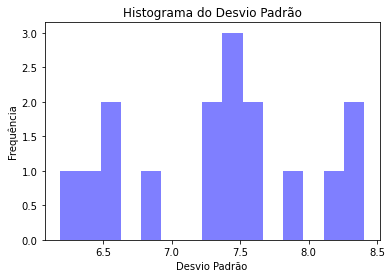

In [157]:
# Definir número de bins
num_bins = 15

# Plotar histograma
n, bins, patches = plt.hist(std_df2, num_bins, facecolor='blue', alpha=0.5)

# Adicionar rótulos e título
plt.xlabel('Desvio Padrão')
plt.ylabel('Frequência')
plt.title('Histograma do Desvio Padrão')

# Exibir plot
plt.show()

## Histograma de cada coluna ##

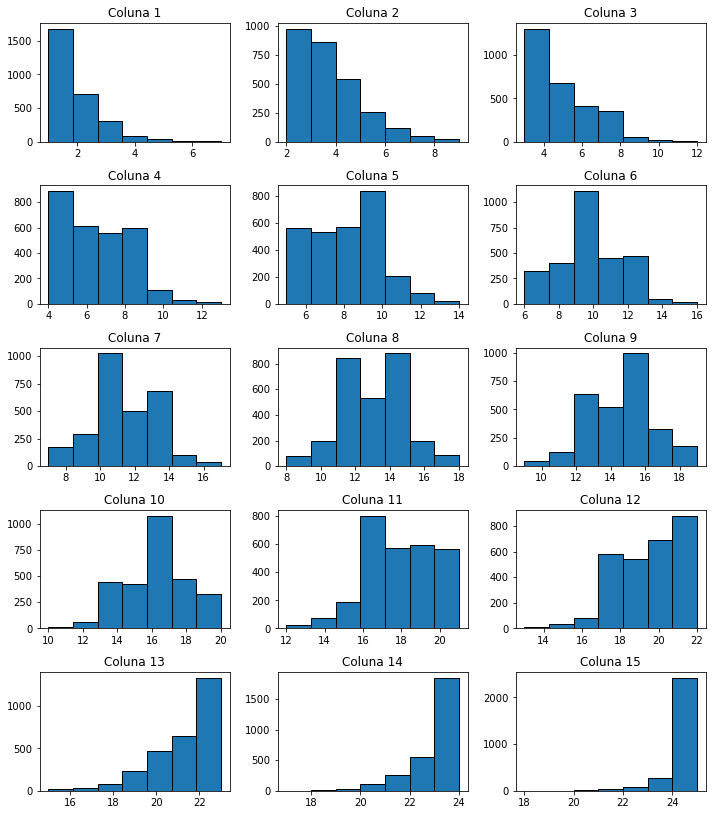

In [158]:
import matplotlib.pyplot as plt

# Define o tamanho da figura
fig = plt.figure(figsize=(10, 45))

# Itera sobre as colunas de 1 a 15
for col in range(1, 16):
    # Seleciona os valores da coluna atual
    data = df.iloc[:, col].values
    
    # Cria um subplot na grade 20x3
    ax = fig.add_subplot(20, 3, col)
    
    # Cria um histograma com 10 bins e exibe o título da coluna
    ax.hist(data, bins=7, edgecolor='black')
    ax.set_title(f"Coluna {col}")
    
# Exibe a figura
plt.tight_layout()
plt.show()


## Analise de Números Compostos - Todos os Jogos ##

In [159]:
# Criando uma lista com os números compostos de 1 a 25
numeros_compostos = [4, 6, 8, 9, 10, 12, 14, 15, 16, 18, 20, 21, 22, 24, 25]

# Criando uma nova coluna no dataframe df que contenha apenas os números de Lucas em cada linha
df['numeros_composto'] = df.iloc[:, 1:16].apply(lambda row: [x for x in row.values if x in numeros_compostos], axis=1)

In [160]:
df.head(1)

,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,bola 7,bola 8,bola 9,bola 10,bola 11,bola 12,bola 13,bola 14,bola 15,pares,impares,primos,Fibonacci,count_by_line,numeros_composto
Concurso,,,,,,,,,,,,,,,,,,,,,,
2818,22/05/2023,1,2,3,4,5,7,9,10,11,12,13,14,15,17,24,6,9,7,5,"{1: 5, 2: 3, 3: 5, 4: 1, 5: 1}","[4, 9, 10, 12, 14, 15, 24]"


## Analise de contagem de frequência de Números Composto - Todos os Jogos ##

In [161]:
# Conta o número de elementos em cada linha de "numeros_composto"
numeros_count = df['numeros_composto'].apply(len)

# Conta a frequência de cada número de elementos e armazena em um dicionário
freq = numeros_count.value_counts().to_dict()

# Imprime a frequência de cada número de elementos
for i in sorted(freq.keys()):
    print(f"{i} números: {freq[i]} vezes")

5 números: 4 vezes
6 números: 43 vezes
7 números: 248 vezes
8 números: 676 vezes
9 números: 887 vezes
10 números: 659 vezes
11 números: 249 vezes
12 números: 47 vezes
13 números: 5 vezes


## Analise de Números Perrin - Todos os Jogos ##

In [162]:
# Criando uma lista com os Números Perrin de 1 a 25
numeros_perrin = [2, 3, 5, 7, 10, 12, 17, 22]

# Criando uma nova coluna no dataframe df que contenha apenas os números de Perrin em cada linha
df['numeros_perrin'] = df.iloc[:, 1:16].apply(lambda row: [x for x in row.values if x in numeros_perrin], axis=1)

## Analise de contagem de frequência de Números Perrin - Todos os Jogos ##

In [164]:
# Conta o número de elementos em cada linha de "numeros_perrin"
numeros_count = df['numeros_perrin'].apply(len)

# Conta a frequência de cada número de elementos e armazena em um dicionário
freq = numeros_count.value_counts().to_dict()

# Imprime a frequência de cada número de elementos
for i in sorted(freq.keys()):
    print(f"{i} números: {freq[i]} vezes")

1 números: 4 vezes
2 números: 47 vezes
3 números: 280 vezes
4 números: 770 vezes
5 números: 977 vezes
6 números: 566 vezes
7 números: 153 vezes
8 números: 21 vezes


## Analise de Números de Lucas - Todos os Jogos ##

In [165]:
# Criando uma lista com os números de Lucas de 1 a 16
lucas_numbers = [1, 2, 3, 4, 7, 11, 18]

# Criando uma nova coluna no dataframe df que contenha apenas os números de Lucas em cada linha
df['numeros_lucas'] = df.iloc[:, 1:16].apply(lambda row: [x for x in row.values if x in lucas_numbers], axis=1)

In [166]:
df.head(1)

,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,bola 7,bola 8,bola 9,bola 10,bola 11,bola 12,bola 13,bola 14,bola 15,pares,impares,primos,Fibonacci,count_by_line,numeros_composto,numeros_perrin,numeros_lucas
Concurso,,,,,,,,,,,,,,,,,,,,,,,,
2818,22/05/2023,1,2,3,4,5,7,9,10,11,12,13,14,15,17,24,6,9,7,5,"{1: 5, 2: 3, 3: 5, 4: 1, 5: 1}","[4, 9, 10, 12, 14, 15, 24]","[2, 3, 5, 7, 10, 12, 17]","[1, 2, 3, 4, 7, 11]"


## Analise de contagem de frequência de Números de Lucas - Todos os Jogos ##

In [167]:
# Conta o número de elementos em cada linha de "numeros_lucas"
numeros_count = df['numeros_lucas'].apply(len)

# Conta a frequência de cada número de elementos e armazena em um dicionário
freq = numeros_count.value_counts().to_dict()

# Imprime a frequência de cada número de elementos
for i in sorted(freq.keys()):
    print(f"{i} números: {freq[i]} vezes")

1 números: 17 vezes
2 números: 142 vezes
3 números: 586 vezes
4 números: 940 vezes
5 números: 809 vezes
6 números: 280 vezes
7 números: 44 vezes


In [168]:
df.head(1)

,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,bola 7,bola 8,bola 9,bola 10,bola 11,bola 12,bola 13,bola 14,bola 15,pares,impares,primos,Fibonacci,count_by_line,numeros_composto,numeros_perrin,numeros_lucas
Concurso,,,,,,,,,,,,,,,,,,,,,,,,
2818,22/05/2023,1,2,3,4,5,7,9,10,11,12,13,14,15,17,24,6,9,7,5,"{1: 5, 2: 3, 3: 5, 4: 1, 5: 1}","[4, 9, 10, 12, 14, 15, 24]","[2, 3, 5, 7, 10, 12, 17]","[1, 2, 3, 4, 7, 11]"


## Gera números aleatórios ##

In [169]:
numeros_gerados = []
num_impares = 7
num_pares = 6
num_primos = [2, 3, 5, 7, 11, 13, 17, 19, 23]
num_fibonacci = [2, 3, 5, 8, 13, 21]
num_perrin = [2, 3, 5, 7, 10, 12, 17, 22]
num_compostos = [4, 6, 8, 9, 10, 12, 14, 15, 16, 18, 20, 21, 22, 24]
num_lucas = [2, 3, 4, 7, 11, 18]

# Adiciona os números primos, Fibonacci, Perrin e Compostos
for num in num_primos + num_fibonacci + num_perrin + num_compostos:
    if num in numeros_gerados:
        continue
    numeros_gerados.append(num)

# Seleciona aleatoriamente os números restantes
while len(numeros_gerados) < 13:
    if num_impares > 0 and num_pares > 0:
        num = random.choice(range(2, 25, 2) if num_pares > num_impares else range(1, 25, 2))
        if num % 2 == 0:
            num_pares -= 1
        else:
            num_impares -= 1
    else:
        num = random.choice(range(2, 25))
    if num in numeros_gerados:
        continue
    numeros_gerados.append(num)

# Adiciona os números de Lucas
num_lucas_gerados = 0
while num_lucas_gerados < random.randint(4, 5):
    num_lucas_gerado = random.choice(num_lucas)
    if num_lucas_gerado not in numeros_gerados:
        numeros_gerados.append(num_lucas_gerado)
        num_lucas_gerados += 1

numeros_gerados.sort()
print(numeros_gerados)

KeyboardInterrupt: 

-- OK -- Análise de frequência de números pares e ímpares
-- OK -- Análise de números primos
-- OK -- Análise de repetições de números
-- OK -- Análise de números mais e menos sorteados
-- OK -- Análise de sequências numéricas
-- OK -- Análise de números que aparecem em sequência
-- OK -- Análise de Jogos repetidos.
-- OK -- Análise de números de Fibonacci.
-- OK -- Contagem de números por linha da cartela
-- OK -- Contagem de Frequencia da contagem de números por linha
-- OK -- Análise de desvio padrão
-- OK -- Histograma de cada coluna
-- OK -- Analise de Números Compostos
-- OK -- Analise de Números Perrin
-- OK -- Analise de Números de Lucas